# 5 회귀

### 5-1 회귀 소개

지도학습은 분류와 회귀로 나뉜다. \
분류는 예측값이 이산형, 회귀는 연속형 숫자 값. \
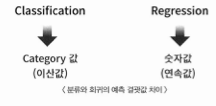 \
선형 회귀 : 실제 값과 예측값의 차이를 최소화하는 직선형 회귀선을 최적화하는 방식 \
대표적인 선형 회귀 모델 : 일반선형회귀, 릿지, 라쏘, 엘라스틱넷, 로지스틱회귀 \
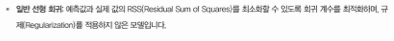 \
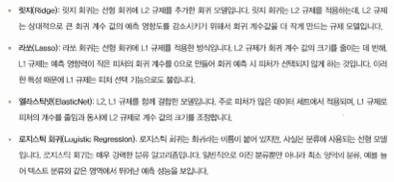




### 5-2 단순 선형 회귀를 통한 회귀 이해

단순 선형 회귀 : 독립변수 하나, 종속 변수 하나.  
주택 가격이 주택의 크기로만 결정된다고 가정했을 때, 일반적으로 주택 크기가 크면 가격이 높아진다. \
회귀모델은 Y(예측값) = w0 + w1*X 로 표현 가능. \
잔차 : 실제값과 회귀 모델의 차이에 따른 오류 값   
오류값은 + 나 - 둘 다 가능하기때문에, 오류 합을 계산할 때 오류가 줄어들 수 있으므로, 방지하기 위해 MAE(오류값에 절댓값을 취함) 또는 RSS(오류값에 제곱을 취함) 을 사용한다. 

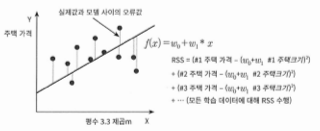 \
RSS를 일반적으로 사용하는데, RSS를 최소화 하는 w0, w1을 학습을 통해서 찾고자 함. \
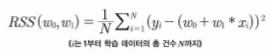 



### 5-3 비용 최소화하기 - 경사하강법 소개

점진적으로 반복적인 계산을 통해 W파라미터 값을 업데이트 하면서 오류 값이 최소가 되는 W파라미터를 구하는 방식 \
최초의 W에서 미분을 적용한 후, 미분 값이 감소하는 방향으로 w를 업데이트 한 후, 더이상 기울기가 감소하지 않는 지점을 비용함수가 최소화 되는 지점으로 간주하고 w를 반환. \
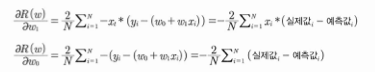 \
경사하강법의 단계는 아래와 같습니다.
1. 임의의 값으로 w0, w1을 설정하고 첫 비용 함수의 값을 계산.
2. w0, w1의 값을 업데이트 하고, 다시 비용함수의 값을 계산.
3. 비용 함수가 감소하는 방향으로 2 단계를 반복하며 w0,w1 값을 비용함수가 최소화 되는 값까지 계속 업데이트. \
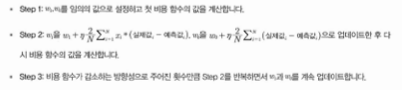



#### 파라미터를 업데이트 하는 방법 3가지
1. 배치경사하강법 : 전체 학습 데이터 세트를 한 번에 모두 사용하여 가중치를 업데이트
2. 확률적경사 하강법 : 전체 데이터 중 한 개의 데이터만 무작위로 선택하여 가중치를 업데이트
3. 미니배치경사 하강법 : 전체 데이터를 작은 그룹으로 나누어 그룹 데이터를 사용하여 업데이트 



### 5-4 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=false, copy_X=True,n_Jobs=1 ) \  
fit() 메서드로 X, y 배열을 입력 받으면, 회귀 계수를 coef_ 속성에 저장

 
로 절편과 회귀 계수 확인 가능

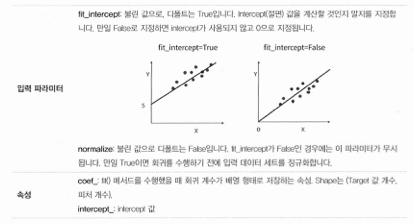 \
OLS(잔차를 최소화 하는 최적의 직선을 찾는 방법) 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받음. \
다중공선성 문제 : 피처 간 상관관계가 매우 높은 경우 분산이 매우 커져 오류에 민감해짐. 중요한 피처만 남기고 제거하거나 규제를 적용. PCA 등으로 해결.

회귀의 성능을 평가하는 지표 : MAE, MSE, RMSE, RMSLE R**2 등등이 있음 \
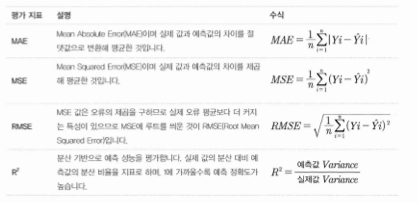


### 5-5 다항 회귀와 과(대)적합 / 과소적합 이해 

다항 회귀 : 2차, 3차 방정식과 같은 다항식으로 표현되는 회귀로 선형회귀이다. \
다항회귀의 차수가 높아질 수록, 복잡한 피처 간의 관계까지 모델링이 가능하지만, 과적합의 문제가 발생할 가능성이 높음. \
편향-분산 트레이드오프 : 
편향이 높으면 분산이 낮아지고 (과소적합), 분산이 높으면 편향이 낮아짐 (과적합) \
편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 지점을 '골디락스' 지점이라 한다. \
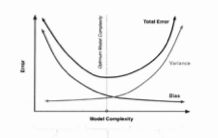


### 5-6 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

비용함수는 학습 데이터의 잔차 오류 값을 최소로 하는 방법과, 괴적합을 방지하기 위해 회귀 계수 값이 너무 커지지 않도록 균형을 맞추는 방법이 균형을 이뤄야 함.

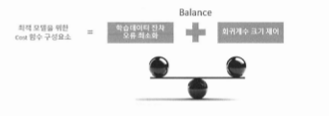 \


규제 : 비용 함수에 a 값을 곱하여 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식
#### 규제의 종류
1. L2 방식 (Ridge) : W**2에 페널티를 부여 (L2 규제를 적용)
2. L1 방식 (Lasso) : W의 절댓값에 패널티를 부여 (L1 규제 적용). 영향력이 작은 회귀 계수 값을 0으로 변환
L2규제는 회귀 계수의 크기를 감소시키지만, L1 규제는 불필요한 회귀 계수를 급격히 감소시켜 0으로 만들어 제거. 적절한 피처만 회귀에 포함시키는 피처 선택의 특성을 가짐.



엘라스틱넷 회귀 : L2 규제와 L1 규재를 결합한 회귀. 라쏘 회귀가 서로 상관관계가 높은 피처 중 중요한 피처만 고르고, 다른 피처들은 회귀 계수를 0으로 만들면서, \
alpha 값에 따라 회귀 계수 값이 급격하게 변함을 완화하기 위해 L2 규제를 추가로 적용. \
단점 : 시간이 오래 걸림

선형 회귀 모델을 적용하기 전, 데이터에 대한 스케일링/정규화 작업을 수행. 스케일링/정규화 작업을 한다고 무조건 예측 성능이 향상되는 것은 아님. 

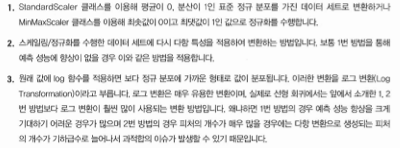

로그로 변환시 np.log(x), np.log1p(x) : (x값에 1을 더하여 x가 0일때를 방지) 가 있음.

### 5-7 로지스틱 회귀
로지스틱 회귀는 선형 회귀 방식을 분류에 적용한 알고리즘\
선형 회귀 방식을 기반으로 하되, 시그모이드 함수를 이용해 분류를 수행하는 회귀 \
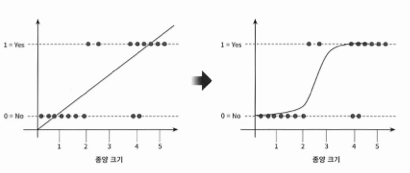

### 5-8 회귀 트리 
회귀트리는 리프 노드에 속한 데이터 값의 평귬값을 구해 회귀 예측값을 계산 \
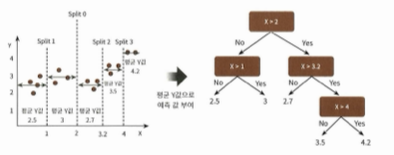 \
회귀 트리 Regressor 클래스는, 선형 회귀와는 다르게 coef_대신, feature_importances_ 를 사용해 피처별 중요성 확인

회귀 모델을 적용하기 전, 데이터 세트의 결과값이 정규 분포인지 확인 필요. 카테고리형 회귀 모댈일 경우 원-핫 인코딩 사용(get_dummies 시용)

스태킹 모델(여러 개의 개별 모델이 예측한 결과 데이터를 다시 학습 데이터로 사용해, 최종 모델이 한번 더 학습하는 방법) 에도 회귀를 적용 가능. 

### 회귀 알고리즘 정리
1) 선형 회귀 : 예측값과 실제값의 RSS를 최소화 하는 방식 사용. 속도는 빠르지만, 이상치에 취약
2) 규제 회귀 : 선형 회귀에 패널티를 더해 과적합을 방지. Ridge는 계수의 크기를 줄이고, Lasso는 불필요한 피처 수를 0으로 만듦.
3) 트리 기반 회귀 : 데이터를 분할 해 평균값으로 예측. 선형회귀보다 비선형적 패턴에 강함. 성능은 강력하지만, 학습데이터 범위 이상의 값은 예측 어려움
4) 스태킹 : 모델의 예측 결과를 다시 최종 모델의 학습 데이터로 사용. 최고 성능을 내기 좋지만, 구현이 어려움.

